In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset=pd.read_csv('Downloads/Copy of AnomaData.csv')

In [3]:
file_path = r'E:\IIM Amritsar\Copy of AnomaData.xlsx'
data = pd.read_excel(file_path)

# Check for missing values
missing_values = data.isnull().sum()

In [4]:
# Check for missing values
missing_values = data.isnull().sum()

In [5]:
# Check data types
data_types = data.dtypes

In [6]:
# Convert 'time' column to datetime
data['time'] = pd.to_datetime(data['time'])

In [7]:
print("Missing Values:\n", missing_values)
print("\nData Types:\n", data_types)
print("\nUpdated 'time' Column Data Type:\n", data['time'].dtype)

Missing Values:
 time    0
y       0
x1      0
x2      0
x3      0
       ..
x57     0
x58     0
x59     0
x60     0
y.1     0
Length: 62, dtype: int64

Data Types:
 time    datetime64[ns]
y                int64
x1             float64
x2             float64
x3             float64
             ...      
x57            float64
x58            float64
x59            float64
x60            float64
y.1              int64
Length: 62, dtype: object

Updated 'time' Column Data Type:
 datetime64[ns]


In [8]:
import seaborn as sns

In [9]:
# Convert 'time' column to datetime
data['time'] = pd.to_datetime(data['time'])

In [10]:
# Generate descriptive statistics
descriptive_stats = data.describe()
print("Descriptive Statistics:\n", descriptive_stats)

Descriptive Statistics:
                   y            x1            x2            x3            x4  \
count  18398.000000  18398.000000  18398.000000  18398.000000  18398.000000   
mean       0.006740      0.011824      0.157986      0.569300     -9.958345   
std        0.081822      0.742875      4.939762      5.937178    131.033712   
min        0.000000     -3.787279    -17.316550    -18.198509   -322.781610   
25%        0.000000     -0.405681     -2.158235     -3.537054   -111.378372   
50%        0.000000      0.128245     -0.075505     -0.190683    -14.881585   
75%        0.000000      0.421222      2.319297      3.421223     92.199134   
max        1.000000      3.054156     16.742105     15.900116    334.694098   

                 x5            x6            x7            x8            x9  \
count  18398.000000  18398.000000  18398.000000  18398.000000  18398.000000   
mean       0.006518      2.387533      0.001647     -0.004125     -0.003056   
std        0.634054     37

In [11]:
# Visualize distributions of the target variable and some features
plt.figure(figsize=(20, 12))

<Figure size 2000x1200 with 0 Axes>

<Figure size 2000x1200 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Target Variable (y)')

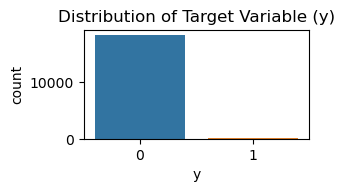

In [12]:
# Plot distribution of the target variable 'y'
plt.subplot(3, 2, 1)
sns.countplot(x='y', data=data)
plt.title('Distribution of Target Variable (y)')

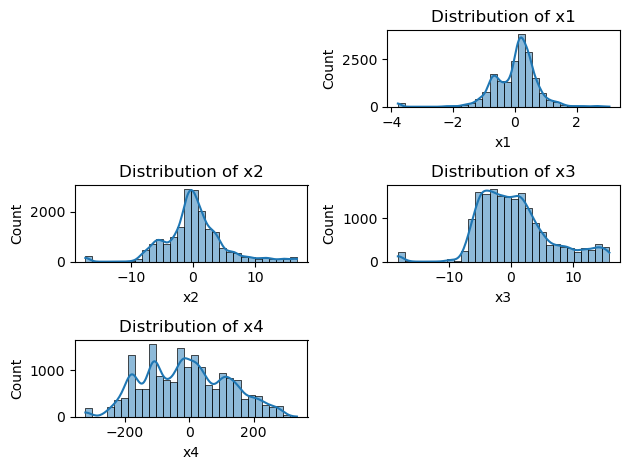

In [13]:
# Plot distribution of a few selected features
selected_features = ['x1', 'x2', 'x3', 'x4']
for i, feature in enumerate(selected_features, 2):
    plt.subplot(3, 2, i)
    sns.histplot(data[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

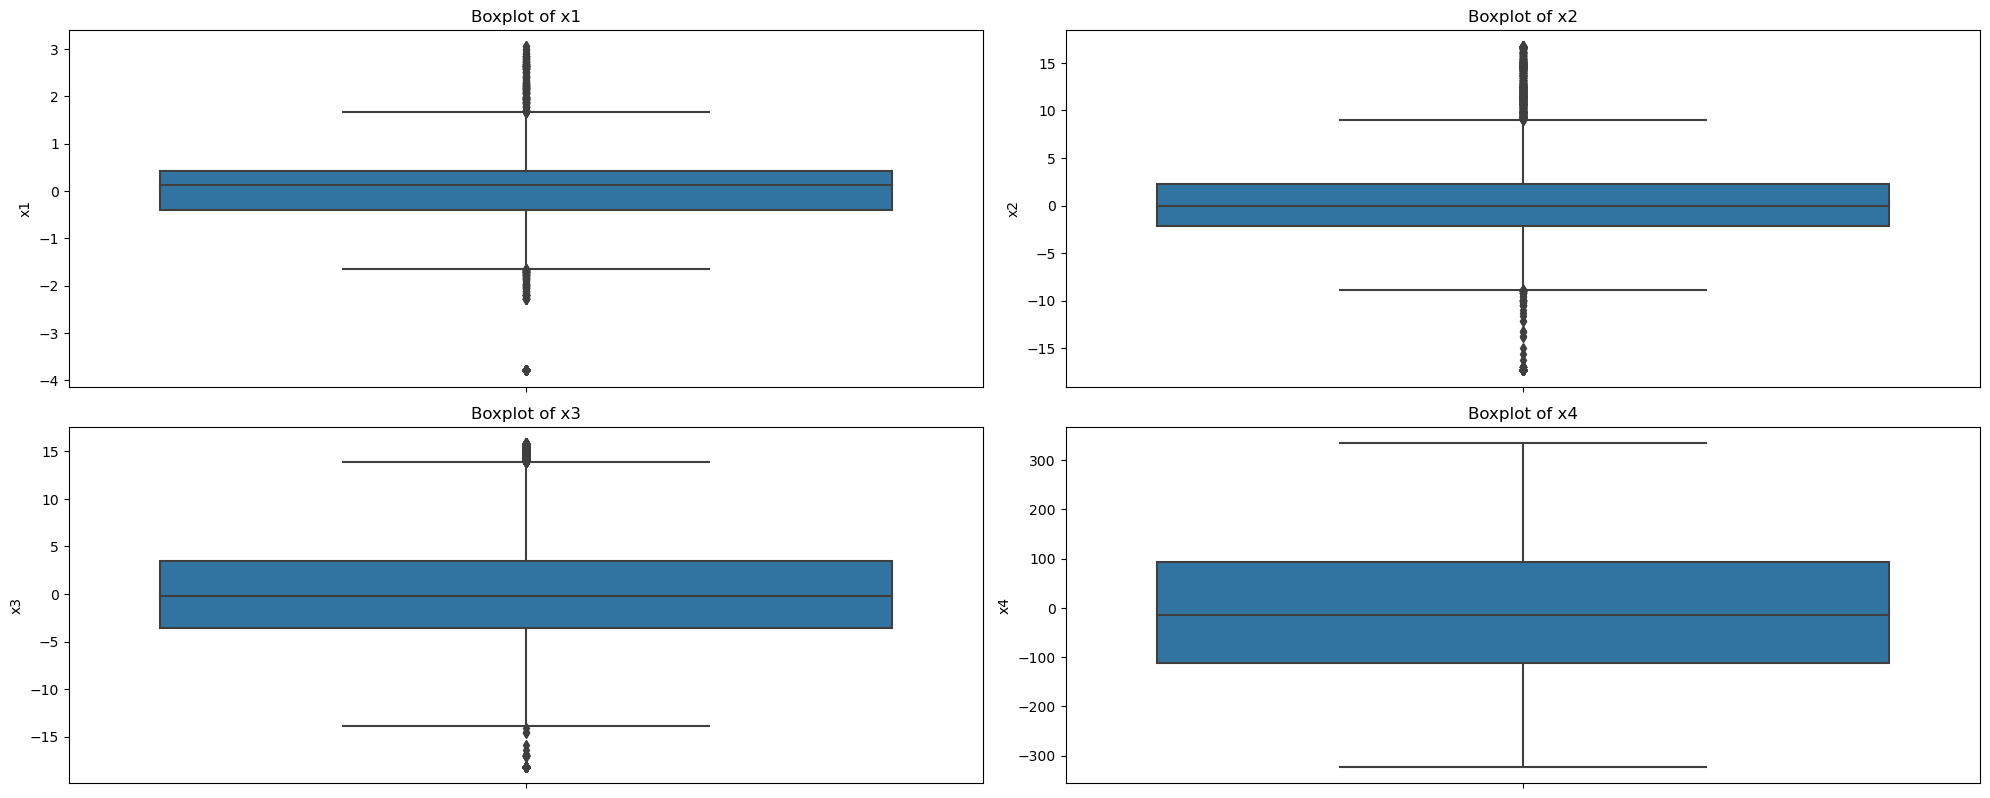

In [14]:
# Identify outliers using boxplots
plt.figure(figsize=(20, 12))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(y=data[feature])
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
# Handle missing values (if any)
# For this example, we'll drop rows with missing values, but you can choose to fill them with a specific value or use other imputation methods
data_cleaned = data.dropna()

In [17]:
# Address duplicate columns (e.g., remove the duplicate target column 'y.1')
if 'y.1' in data_cleaned.columns:
    data_cleaned = data_cleaned.drop(columns=['y.1'])

In [18]:
# Standardize data if necessary (e.g., scale features to have zero mean and unit variance)
features = data_cleaned.drop(columns=['time', 'y'])
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [19]:
# Recreate the cleaned dataframe with standardized features
data_cleaned_scaled = pd.DataFrame(features_scaled, columns=features.columns)
data_cleaned_scaled['time'] = data_cleaned['time'].reset_index(drop=True)
data_cleaned_scaled['y'] = data_cleaned['y'].reset_index(drop=True)

In [20]:
# Display the first few rows of the cleaned and standardized data
print(data_cleaned_scaled.head())

         x1        x2        x3        x4        x5        x6        x7  \
0  0.491135 -0.962506 -0.785758  0.179012 -0.197698 -0.621443 -0.008403   
1  0.624478 -0.951588 -0.772721  0.199870 -0.213317 -0.569916 -0.008403   
2  0.473881 -0.979705 -0.829111  0.183823 -0.228936 -0.545082  0.084105   
3  0.390072 -0.995403 -0.773606  0.176447 -0.243928 -0.563435  0.003933   
4  0.341594 -0.993580 -0.825743  0.192518 -0.255240 -0.536168 -0.008403   

         x8        x9       x10  ...       x52       x54       x55       x56  \
0 -0.755236 -0.364704 -0.334939  ...  1.563441 -1.686831 -0.396964  0.114191   
1 -0.755236 -0.364704 -0.334939  ...  1.564109 -1.687077 -0.512114  0.166418   
2 -0.755236 -0.173032 -0.148717  ...  1.564816 -1.687323 -0.538174  0.218645   
3 -0.755236 -0.108492 -0.054165  ...  1.565524 -1.687569 -0.564234  0.153036   
4 -0.755236 -0.173032 -0.054165  ...  1.566231 -1.687815 -0.590295  0.155925   

        x57       x58       x59       x60                time  y  
0

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

In [22]:
# Feature Engineering - Extract time-based features
data_cleaned['hour'] = data_cleaned['time'].dt.hour
data_cleaned['day'] = data_cleaned['time'].dt.day
data_cleaned['dayofweek'] = data_cleaned['time'].dt.dayofweek

In [23]:
# Standardize the data
features = data_cleaned.drop(columns=['time', 'y'])
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [24]:
# Recreate the cleaned dataframe with standardized features
data_cleaned_scaled = pd.DataFrame(features_scaled, columns=features.columns)
data_cleaned_scaled['y'] = data_cleaned['y'].reset_index(drop=True)

In [25]:
# Feature Selection using Random Forest
X = data_cleaned_scaled.drop(columns=['y'])
y = data_cleaned_scaled['y']


In [26]:
# RandomForest for Feature Importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

RandomForestClassifier(random_state=42)

In [27]:
# Get feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

In [28]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print(f"{f + 1}. Feature {indices[f]} ({importances[indices[f]]})")

Feature ranking:
1. Feature 2 (0.12422080382696472)
2. Feature 1 (0.07311914497119483)
3. Feature 17 (0.051253774507334135)
4. Feature 16 (0.03851059401407261)
5. Feature 52 (0.02821254195877434)
6. Feature 18 (0.023765053465823846)
7. Feature 11 (0.020792431368347363)
8. Feature 39 (0.01989645671249215)
9. Feature 28 (0.01829763266521538)
10. Feature 48 (0.018089030737211905)
11. Feature 14 (0.018034478794102714)
12. Feature 31 (0.017200765079692353)
13. Feature 33 (0.01718698213693041)
14. Feature 37 (0.01707975325475236)
15. Feature 36 (0.016084339103999843)
16. Feature 44 (0.01589656320712789)
17. Feature 8 (0.015888493580790426)
18. Feature 15 (0.015584456166273457)
19. Feature 21 (0.015507200301797574)
20. Feature 29 (0.015273579891844847)
21. Feature 46 (0.015259431545666854)
22. Feature 5 (0.015180917816925236)
23. Feature 41 (0.01465179302224957)
24. Feature 49 (0.014516369263109759)
25. Feature 7 (0.014408835520369298)
26. Feature 0 (0.014153757304307514)
27. Feature 25 (0.01

In [29]:
# Select the most important features using RFE
rfe = RFE(estimator=rf, n_features_to_select=10)
rfe.fit(X, y)

RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=10)

#### 

In [30]:
# Get the selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['x2', 'x3', 'x12', 'x16', 'x17', 'x18', 'x29', 'x30', 'x34', 'x45'], dtype='object')


In [31]:
# Use only the selected features for modeling
X_selected = X[selected_features]

In [32]:
# Display the first few rows of the dataset with selected features
print(X_selected.head())

         x2        x3       x12       x16       x17       x18       x29  \
0 -0.962506 -0.785758 -0.028528  0.120785 -1.147266 -0.538854 -1.086264   
1 -0.951588 -0.772721 -0.012267  0.166598 -1.153453 -0.536711 -1.087819   
2 -0.979705 -0.829111  0.021078  0.144013 -1.159641 -0.534569 -1.083718   
3 -0.995403 -0.773606 -0.034508  0.065048 -1.165829 -0.532426 -1.084148   
4 -0.993580 -0.825743 -0.014043  0.108118 -1.172017 -0.530282 -1.077562   

        x30       x34       x45  
0  0.621554 -0.973823 -0.185723  
1  0.621927 -0.965865 -0.240032  
2  0.622289 -0.955996 -0.031810  
3  0.622662 -0.946127 -0.267812  
4  0.623024 -0.931604 -0.081680  


#### 

#### 

In [33]:
# Train/Test Split using stratified sampling
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, stratify=y, random_state=42)

In [34]:
# Display the shapes of the train and test sets
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Training set class distribution:\n", y_train.value_counts(normalize=True))
print("Test set class distribution:\n", y_test.value_counts(normalize=True))

Training set shape: (14718, 10)
Test set shape: (3680, 10)
Training set class distribution:
 0    0.993274
1    0.006726
Name: y, dtype: float64
Test set class distribution:
 0    0.993207
1    0.006793
Name: y, dtype: float64


In [35]:
# Train a Random Forest classifier on the training set
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [36]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

In [38]:
# Compute the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)

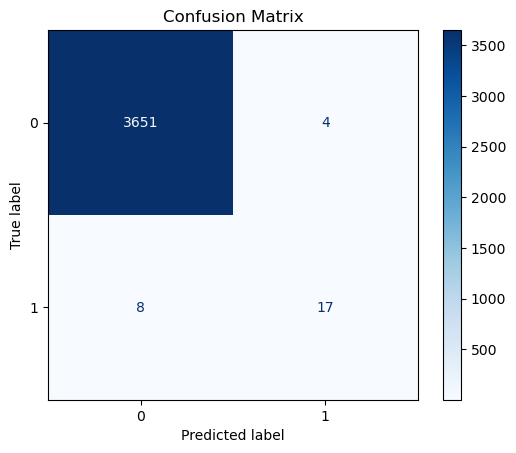

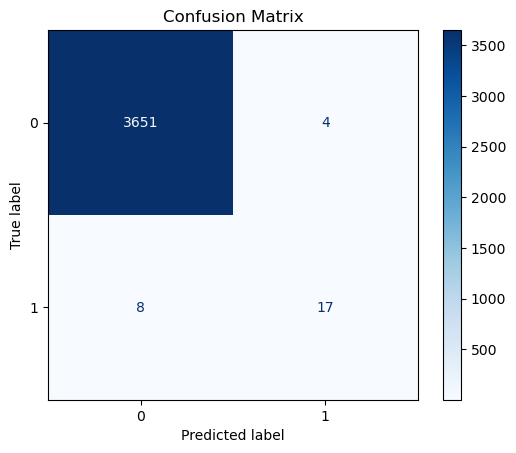

In [39]:
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()